# CREDIT CARD FRAUD CLASSIFIER

<b>
Greetings Everyone !!
<br>
Myself, Aayushi Gupta , 
<br>
Machine Learning Intern at CODSOFT, INDIA
<br>
</b>
This is my Second task at CODSOFT INTERNSHIP (November 25,2023 to December 25,2023)
<br>
PRESENTING TO YOU --- CREDIT CARD FRAUD CLASSIFIER MODEL(Task 2 in the list)
<br>
<BR>
<B>TASK</B>
Build a model to detect fraudulent credit card transactions. Use a
dataset containing information about credit card transactions, and
experiment with algorithms like Logistic Regression, Decision Trees,
or Random Forests to classify transactions as fraudulent or
legitimate

## Reading the datasets

In [1]:
# lets import all the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.utils import resample

In [2]:
train_data = pd.read_csv("fraudTrain.csv")
test_data = pd.read_csv("fraudTest.csv")

In [3]:
train_data.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [4]:
train_data.describe()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06
mean,6.483370e+05,4.171920e+17,7.035104e+01,4.880067e+04,3.853762e+01,-9.022634e+01,8.882444e+04,1.349244e+09,3.853734e+01,-9.022646e+01,5.788652e-03
std,3.743180e+05,1.308806e+18,1.603160e+02,2.689322e+04,5.075808e+00,1.375908e+01,3.019564e+05,1.284128e+07,5.109788e+00,1.377109e+01,7.586269e-02
min,0.000000e+00,6.041621e+10,1.000000e+00,1.257000e+03,2.002710e+01,-1.656723e+02,2.300000e+01,1.325376e+09,1.902779e+01,-1.666712e+02,0.000000e+00
25%,3.241685e+05,1.800429e+14,9.650000e+00,2.623700e+04,3.462050e+01,-9.679800e+01,7.430000e+02,1.338751e+09,3.473357e+01,-9.689728e+01,0.000000e+00
50%,6.483370e+05,3.521417e+15,4.752000e+01,4.817400e+04,3.935430e+01,-8.747690e+01,2.456000e+03,1.349250e+09,3.936568e+01,-8.743839e+01,0.000000e+00
75%,9.725055e+05,4.642255e+15,8.314000e+01,7.204200e+04,4.194040e+01,-8.015800e+01,2.032800e+04,1.359385e+09,4.195716e+01,-8.023680e+01,0.000000e+00
max,1.296674e+06,4.992346e+18,2.894890e+04,9.978300e+04,6.669330e+01,-6.795030e+01,2.906700e+06,1.371817e+09,6.751027e+01,-6.695090e+01,1.000000e+00


In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

In [6]:
# considering the features that seem to have more significance over other features
train_data = train_data[["trans_date_trans_time","cc_num","amt","gender","zip","lat","long","city_pop","merch_lat","merch_long","is_fraud"]]
test_data = test_data[["trans_date_trans_time","cc_num","amt","gender","zip","lat","long","city_pop","merch_lat","merch_long","is_fraud"]]

In [7]:
# Our target is the column "is_fraud"
# lets check for number of fraud and not fraud entries
train_data.is_fraud.value_counts()[1]

7506

In [8]:
train_data.is_fraud.value_counts()[0]

1289169

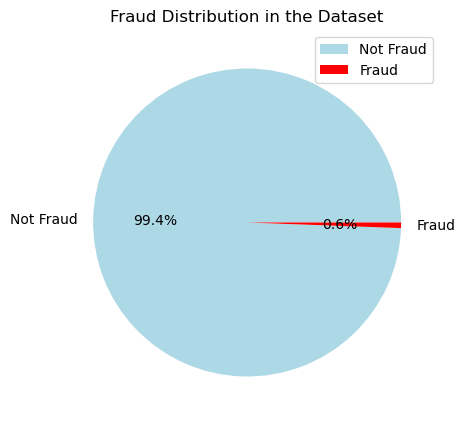

In [9]:
fraud_counts = train_data['is_fraud'].value_counts()
# Create a pie chart to show the distribution of the values of is_fraud column
categories=["Not Fraud","Fraud"]
plt.figure(figsize=(5, 5))
plt.pie(fraud_counts, labels=categories, autopct='%1.1f%%', colors=['lightblue', 'red'])
plt.title('Fraud Distribution in the Dataset')
plt.legend()
plt.show()

In [10]:
# the above visulaization shows that our dataset is unbalanced
# The training data is highly skewed data because there are too many not frauds 
# hence data preprocesisng is needed
train_data=train_data.drop_duplicates()
train_data

,trans_date_trans_time,cc_num,amt,gender,zip,lat,long,city_pop,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:18,2703186189652095,4.97,F,28654,36.0788,-81.1781,3495,36.011293,-82.048315,0
1,2019-01-01 00:00:44,630423337322,107.23,F,99160,48.8878,-118.2105,149,49.159047,-118.186462,0
2,2019-01-01 00:00:51,38859492057661,220.11,M,83252,42.1808,-112.2620,4154,43.150704,-112.154481,0
3,2019-01-01 00:01:16,3534093764340240,45.00,M,59632,46.2306,-112.1138,1939,47.034331,-112.561071,0
4,2019-01-01 00:03:06,375534208663984,41.96,M,24433,38.4207,-79.4629,99,38.674999,-78.632459,0
...,...,...,...,...,...,...,...,...,...,...,...
1296670,2020-06-21 12:12:08,30263540414123,15.56,M,84735,37.7175,-112.4777,258,36.841266,-111.690765,0
1296671,2020-06-21 12:12:19,6011149206456997,51.70,M,21790,39.2667,-77.5101,100,38.906881,-78.246528,0
1296672,2020-06-21 12:12:32,3514865930894695,105.93,M,88325,32.9396,-105.8189,899,33.619513,-105.130529,0
1296673,2020-06-21 12:13:36,2720012583106919,74.90,M,57756,43.3526,-102.5411,1126,42.788940,-103.241160,0


In [11]:
# performing upsampling to increase the data where "is_fraud"==1
majoritydata=train_data[train_data["is_fraud"]==0]
minoritydata=train_data[train_data["is_fraud"]==1]
upsample=resample(minoritydata,replace=True,n_samples=len(majoritydata))
train_data = pd.concat([majoritydata,upsample])

## BUILDING MODEL

### Preparing for building model

In [12]:
# convert the "trans_data_trans_time" column to standard datetime format
train_data["trans_date_trans_time"] = pd.to_datetime(train_data["trans_date_trans_time"])
test_data["trans_date_trans_time"] = pd.to_datetime(test_data["trans_date_trans_time"])


In [13]:
# retrieving day, month , hour from trans_date_trans_time column
train_data['hour'] = train_data['trans_date_trans_time'].dt.hour
test_data['hour'] = test_data['trans_date_trans_time'].dt.hour

train_data['day'] = train_data['trans_date_trans_time'].dt.day
test_data['day'] = test_data['trans_date_trans_time'].dt.day

train_data['month'] = train_data['trans_date_trans_time'].dt.month
test_data['month'] = test_data['trans_date_trans_time'].dt.month

# since all the date and time has been extracted
# drop the "trans_data_trans_time" column
train_data.drop("trans_date_trans_time",axis=1,inplace=True)
test_data.drop("trans_date_trans_time",axis=1,inplace=True)

# train_data.dropna(inplace=True)

In [14]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2578338 entries, 0 to 356718
Data columns (total 13 columns):
 #   Column      Dtype  
---  ------      -----  
 0   cc_num      int64  
 1   amt         float64
 2   gender      object 
 3   zip         int64  
 4   lat         float64
 5   long        float64
 6   city_pop    int64  
 7   merch_lat   float64
 8   merch_long  float64
 9   is_fraud    int64  
 10  hour        int32  
 11  day         int32  
 12  month       int32  
dtypes: float64(5), int32(3), int64(4), object(1)
memory usage: 245.9+ MB


In [15]:
#only gender column is now not in numeric data
train_data['gender'] = train_data['gender'].map({'F':0,'M':1})
test_data['gender'] = test_data['gender'].map({'F':0,'M':1})

In [16]:
# spliiting the dataset into training input and training output
X_train = train_data.drop('is_fraud',axis=1)
y_train = train_data['is_fraud']
# spliiting the dataset into testing input and testing output
X_test = test_data.drop('is_fraud',axis=1)
y_test = test_data['is_fraud']


In [20]:
# performing standardisation
scale = StandardScaler()
X_train = scale.fit_transform(X_train)
X_test = scale.transform(X_test)

In [21]:
model = LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [22]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,model.predict(X_test))

array([[533591,  19983],
       [   556,   1589]], dtype=int64)